## Introducción

El objetivo de estos laboratorios es presentar una introducción a la visualización de datos con Python de la manera más consistente y coherente como sea posible. Hablando de consistencia, debido a que no hay una  mejor biblioteca para la visualización de datos disponible para Python (hasta la creación de estos laboratorios), cuando tratamos nuevos conceptos de visualización debemos presentar distintas bibliotecas y demostrar sus beneficios. Al hacerlo, esperamos que los estudiantes aprendan sobre las bibliotecas de visualización y sobre los conceptos relacionados para que puedan juzgar y decidir cuál es la mejor técnica y herramienta de visualización para un problema _y_ una audiencia en particular. 

Asegúrese de haber completado los requisitos previos para este curso; en específico, [**Python para la ciencia de datos**](https://cognitiveclass.ai/courses/python-for-data-science/).

**Nota**: La mayoría de los diagramas y visualizaciones se generarán con datos almacenados en un DataFrame de *pandas*. Por lo tanto, en este laboratorio ofreceremos un curso breve e intensivo sobre *pandas*. Sin embargo, si le interesa la posibilidad de aprender más sobre la biblioteca de pandas, se ofrecen una descripción detallada y una explicación de cómo usarla y cómo limpiar, manipular y procesar los datos almacenados en un DataFrame de *pandas* en el curso [**Análisis de datos con Python**](https://cognitiveclass.ai/courses/data-analysis-python/). 

------------

## Índice

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Explorando conjuntos de datos con *pandas*](#0)<br>
1.1 [El conjunto de datos: Inmigración a Canadá entre 1980 a 2013](#2)<br>
1.2 [Aspectos básicos de *pandas*](#4) <br>
1.3 [Nivel intermedio de *pandas*: Indexación y selección ](#6) <br>
2. [Visualización de datos mediante Matplotlib](#8) <br>
2.1 [Matplotlib: Biblioteca estándar de visualización con Python ](#10) <br>
3. [Gráficos de líneas](#12)
</div>
<hr>

# Explorando conjuntos de datos con *pandas* <a id="0"></a>

*pandas* es un kit de herramientas fundamental para el análisis de datos en Python. Según se indica en su [sitio web](http://pandas.pydata.org/):
>*pandas* es un paquete de Python que ofrece estructuras de datos rápidas, flexibles y expresivas diseñadas para hacer que trabajar con datos “relacionales” o “etiquetados” sea fácil e intuitivo. Su objetivo es ser el componente fundamental de alto nivel para llevar a cabo el análisis de datos prácticos y del **mundo real** en Python. 

El curso depende en gran medida de *pandas* para el manejo, análisis y visualización de datos. Le recomendamos que se tome el tiempo necesario para familiarizarse con la referencia de la API de *pandas* http://pandas.pydata.org/pandas-docs/stable/api.html.

## El conjunto de datos Inmigración a Canadá entre 1980 a 2013 <a id="2"></a>

Fuente del conjunto de datos:  [Corrientes migratorias internacionales hacia y desde determinados países, revisión de 2015](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml).

El conjunto de datos contiene datos anuales sobre las corrientes inmigratorias internacionales según las registraron los países de destino. Los datos presentan corrientes entrantes y salientes, según el lugar de nacimiento, la ciudadanía o el lugar de residencia anterior/posterior para extranjeros y no extranjeros. La versión actual presenta datos pertenecientes a 45 países. 

En este laboratorio, nos enfocaremos en los datos inmigratorios de Canadá. 

Para mayor simplicidad, los datos inmigratorios de Canadá se extrajeron y se cargaron en un servidor de IBM. Usted puede obtener los datos [aquí](https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx).

---

## Aspectos básicos de *pandas* <a id="4"></a>

Lo primero que haremos es importar dos módulos fundamentales para el análisis de datos: *pandas* y **Numpy**.

In [1]:
import numpy as np  # es útil para muchos cálculos científicos en Python
import pandas as pd # biblioteca principal de estructura de datos 

Descarguemos e importemos el conjunto de datos principal sobre la inmigración canadiense con el método `read_excel()` de *pandas*. Habitualmente, para poder hacerlo, debemos descargar un módulo que pandas necesita para leer en archivos de Excel. Este módulo es el **xlrd**. Para su conveniencia, ya hemos instalado este módulo, así no deberá preocuparse por ello. De lo contrario, usted debería ejecutar la siguiente línea de código para instalar el módulo **xlrd**: 
```
!conda install -c anaconda xlrd --yes
```

In [2]:
#!conda install -c anaconda xlrd --yes

Ahora estamos listos para leer los datos. 

In [4]:
# df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
#                       sheet_name='Canada by Citizenship',
#                       skiprows=range(20),
#                       skip_footer=2)

df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skip_footer=2)

print ('¡Datos leídos en un DataFrame de pandas!')

# https://app.box.com/file/689083506126

¡Datos leídos en un DataFrame de pandas!


Observemos las 5 filas superiores del conjunto de datos con la función `head()`.

In [5]:
df_can.head(10)
# sugerencia: Puede especificar la cantidad de filas que desea ver de la siguiente manera: df_can.head(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
5,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45
6,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,...,14,24,32,15,32,38,27,37,51,25
7,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,...,1591,1153,847,620,540,467,459,278,263,282
8,Immigrants,Foreigners,Armenia,935,Asia,922,Western Asia,902,Developing regions,0,...,147,224,218,198,205,267,252,236,258,207
9,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,...,930,909,875,1033,1018,1018,933,851,982,1121


También podemos visualizar las últimas 5 filas del conjunto de datos con la función `tail()`.

In [6]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407
195,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,44000,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484
196,Immigrants,Both,Total,999,World,999,World,999,World,143137,...,235822,262242,251640,236753,247244,252170,280687,248748,257903,259021


Al analizar un conjunto de datos, siempre es recomendable comenzar por obtener información básica sobre el DataFrame. Para ello, podemos usar el método `info()`.

In [7]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      197 non-null    object
 1   Coverage  197 non-null    object
 2   OdName    197 non-null    object
 3   AREA      197 non-null    int64 
 4   AreaName  197 non-null    object
 5   REG       197 non-null    int64 
 6   RegName   197 non-null    object
 7   DEV       197 non-null    int64 
 8   DevName   197 non-null    object
 9   1980      197 non-null    int64 
 10  1981      197 non-null    int64 
 11  1982      197 non-null    int64 
 12  1983      197 non-null    int64 
 13  1984      197 non-null    int64 
 14  1985      197 non-null    int64 
 15  1986      197 non-null    int64 
 16  1987      197 non-null    int64 
 17  1988      197 non-null    int64 
 18  1989      197 non-null    int64 
 19  1990      197 non-null    int64 
 20  1991      197 non-null    int64 
 21  1992      197 no

Para obtener la lista de encabezados de columna, podemos invocar el parámetro `.columns` del DataFrame.

In [8]:
df_can.columns.values 

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

De manera similar, para obtener la lista de índices utilizamos el parámetro `.index`.

In [9]:
df_can.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Nota: El tipo predeterminado de índice y columnas NO es lista.

In [10]:
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


Para obtener el índice y las columnas como listas, podemos usar el método `tolist()`.

In [11]:
df_can.columns.tolist()
df_can.index.tolist()

print (type(df_can.columns.tolist()))
print (type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


Para visualizar las dimensiones del DataFrame, utilizamos el parámetro `.shape`.

In [12]:
# tamaño del dataframe (filas, columnas)
df_can.shape    

(197, 43)

Nota: Los tipos principales almacenados en objetos de *pandas* son *float*, *int*, *bool*, *datetime64[ns]* and *datetime64[ns, tz] (in >= 0.17.0)*, *timedelta[ns]*, *category (in >= 0.15.0)*, and *object* (string). Además, estos dtypes tienen tamaños de elemento; p. ej., int64 e int32. 

Limpiemos el conjunto de datos para eliminar algunas columnas innecesarias. Podemos usar el método `drop()` de *pandas* de la manera siguiente: 

In [13]:
# en pandas el axis=0 representa filas (predeterminado) y el axis=1 representa columnas.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Cambiemos el nombre de las columnas para que tengan sentido. Podemos usar el método `rename()` al ejecutar un diccionario con nombres anteriores y nuevos de la manera siguiente:

In [14]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

También agregaremos una columna de 'Total' que resume la cantidad total de inmigrantes por país durante todo el periodo entre 1980 a 2013 de la manera siguiente: 

In [15]:
df_can['Total'] = df_can.sum(axis=1)

Podemos verificar para determinar cuántos objetos nulos hay en el conjunto de datos de la manera siguiente: 

In [16]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

Finalmente, veamos un resumen rápido de cada columna en nuestro DataFrame con el método `describe()`.

In [17]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.00000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02
mean,1453.167513,1306.000000,1230.203046,905.431472,896.162437,856.304569,1008.639594,1543.908629,1640.456853,1944.670051,...,2662.35533,2554.720812,2403.583756,2510.091371,2560.101523,2849.614213,2525.360406,2618.304569,2629.654822,7.029657e+04
std,10784.524807,9449.373841,8864.905615,6503.149859,6452.570413,6155.858422,7205.630681,11045.558746,11809.252241,13939.908653,...,19104.65330,18261.461660,17129.490442,17908.071420,18276.881231,20386.174875,18082.496369,18763.159434,18838.224387,5.004158e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,29.00000,26.000000,32.000000,32.000000,37.000000,42.000000,38.000000,43.000000,45.000000,9.520000e+02
50%,14.000000,10.000000,12.000000,12.000000,14.000000,17.000000,21.000000,33.000000,36.000000,45.000000,...,211.00000,230.000000,198.000000,205.000000,217.000000,216.000000,196.000000,235.000000,217.000000,5.866000e+03
75%,266.000000,299.000000,299.000000,197.000000,207.000000,202.000000,257.000000,467.000000,476.000000,538.000000,...,857.00000,856.000000,975.000000,975.000000,917.000000,953.000000,851.000000,799.000000,852.000000,2.331000e+04
max,143137.000000,128641.000000,121175.000000,89185.000000,88272.000000,84346.000000,99351.000000,152075.000000,161585.000000,191550.000000,...,262242.00000,251640.000000,236753.000000,247244.000000,252170.000000,280687.000000,248748.000000,257903.000000,259021.000000,6.924212e+06


---
## Nivel intermedio de *pandas*: Indexación y selección (división) <a id="6"></a>


### Seleccionar columna
**Hay dos maneras de aplicar un filtro en un nombre de columna:**

Método 1: Es rápido y fácil, pero solo funciona si el nombre de la columna NO tiene espacios ni caracteres especiales.
```python
    df.column_name 
        (returns series)
```

Método 2: Más sólido y puede filtrar múltiples columnas.

```python
    df['column']  
        (Devuelve una serie)
```

```python 
    df[['column 1', 'column 2']] 
        (Devuelve un DataFrame)
```
---

Ejemplo: Intentemos filtrar la lista de países ('País' ['Country']).

In [18]:
df_can.Country  # devuelve una serie

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
192             Yemen
193            Zambia
194          Zimbabwe
195           Unknown
196             Total
Name: Country, Length: 197, dtype: object

Intentemos filtrar la lista de países ('NombreOd' ['OdName']) y los datos para los años: 1980 - 1985. 

In [19]:
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe
# tenga en cuenta que 'País' es una cadena y que los años son números enteros.
# para mayor coherencia, convertiremos todos los nombres de las columnas en cadenas posteriormente.

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9
194,Zimbabwe,72,114,102,44,32,29
195,Unknown,44000,18078,16904,13635,14855,14368


### Seleccionar fila

Hay 3 maneras principales de seleccionar filas:

```python
    df.loc[label]        
        #filtra por las etiquetas del índice/de la columna
    df.iloc[index]       
        #filtras por las posiciones del índice/de la columna 
```

Antes de continuar, observe que el índice predeterminado del conjunto de datos es un rango numérico de 0 a 194. Así, resulta muy difícil llevar a cabo una consulta por un país en específico. Por ejemplo, para buscar datos sobre Japón, debemos conocer el valor de índice correspondiente. 

Para corregir esto fácilmente, establezca la columna 'País' como el índice con el método `set_index()`. 

In [20]:
df_can.set_index('Country', inplace=True)
# sugerencia: El opuesto de establecer es restablecer. Entonces, para restablecer el índice, podemos usar df_can.reset_index()

In [21]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [22]:
# opcional: quitar el nombre del índice 
df_can.index.name = None

Ejemplo: Observemos la cantidad de inmigrantes provenientes de Japón (fila 87) para las situaciones siguientes: 
    1. Todos los datos de la fila (todas las columnas)
    2. Para el año 2013
    3. Para los años 1980 a 1985

In [23]:
# 1. todos los datos de la fila (todas las columnas) 
print(df_can.loc['Japan'])

# métodos alternativos
print(df_can.iloc[87])
print(df_can[df_can.index == 'Japan'].T.squeeze())

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [24]:
# 2. para el año 2013 
print(df_can.loc['Japan', 2013])

# métodos alternativos
print(df_can.iloc[87, 36]) # el año 2013 es la última columna, con un índice de posición de 36

982
982


In [26]:
# 3. para los años 1980 a 1985 
print(df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]])
print(df_can.iloc[87, [3, 4, 5, 6, 7, 8]])

1980    701
1981    756
1982    598
1983    309
1984    246
1984    246
Name: Japan, dtype: object
1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object


Los nombres de columnas que son números enteros (como los años) pueden agregar confusión. Por ejemplo, cuando hacemos referencia al año 2013, podemos confundirlo con el índice de posición 2013.º. 

Para evitar esta ambigüedad, convirtamos los nombres de columna a cadenas: '1980' a '2013'. 

In [27]:
df_can.columns = list(map(str, df_can.columns))
# [print (type(x)) for x in df_can.columns.values] #<-- deshacer comentario para verificar el tipo de encabezados de columna

Debido a que convertimos los años en una cadena, declaremos una variable que nos permita invocar fácilmente el rango completo de años:

In [28]:
# útil para la diagramación posterior
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Filtrado en función de un criterio 
Para filtrar el DataFrame en función de una condición, solo debemos ejecutar la condición como vector booleano. 

Por ejemplo, filtremos el DataFrame para mostrar los datos en los países de Asia (AreaName = Asia). 

In [29]:
# 1. cree la serie booleana de la condición
condition = df_can['Continent'] == 'Asia'
print (condition)

Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Yemen              True
Zambia            False
Zimbabwe          False
Unknown           False
Total             False
Name: Continent, Length: 197, dtype: bool


In [30]:
# 2. ejecute la condición en el dataframe
df_can[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,...,729,712,674,897,657,623,591,728,774,9327


In [31]:
# podemos ejecutar múltiples criterios en la misma línea.
# filtremos por NombreÁrea = Asia y NombreReg = Sur de Asia

df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

# nota: al usar operadores 'and' y 'or', pandas requiere el uso de '&' y '|' en lugar de 'and' y 'or' 
# no olvide encerrar las dos condiciones entre paréntesis 

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


Antes de continuar, repasemos los cambios llevados a cabo en nuestro DataFrame.

In [32]:
print ('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (197, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


---
# Visualización de datos mediante Matplotlib<a id="8"></a>

## Matplotlib: Biblioteca estándar de visualización con Python<a id="10"></a>

La primera biblioteca de diagramación que exploraremos en el curso es [Matplotlib](http://matplotlib.org/).  Tal como se menciona en su sitio web:
>Matplotlib es una biblioteca de diagramación en 2D con Python que produce figuras en calidad de publicación en diversos formatos para impresión y entornos interactivos entre plataformas. Matplotlib puede usarse en secuencias de comandos de Python, el shell de Python e IPython, libretas de Jupyter, servidores de aplicaciones web y cuatro kits de herramientas de interfaz de usuarios gráficas.

Si aspira a crear visualizaciones impactantes con Python, Matplotlib es una herramienta fundamental.

### Matplotlib.Pyplot

Uno de los aspectos fundamentales de Matplotlib es `matplotlib.pyplot`. Se trata de la capa de secuencias de comandos de Matplotlib, la cual estudiamos en detalle en los videos sobre Matplotlib. Recuerde que se trata de una colección de funciones de estilo de comando que hacen que Matplotlib funcione como MATLAB. Cada función de `pyplot` lleva a cabo algún cambio en una figura; por ejemplo, crea una figura, crea un área de diagramación en una figura, diagrama algunas líneas en un área de diagramación, decora el diagrama con etiquetas, etc. En este laboratorio, trabajaremos con la capa de secuencias de comandos para aprender a generar gráficos de líneas. En laboratorios futuros, trabajaremos también con la capa Artist para experimentar de primera mano las diferencias con la capa de secuencias de comandos.

Para comenzar, importemos `Matplotlib` y `Matplotlib.pyplot` de la siguiente manera: 

In [33]:
# estamos usando el backend en línea
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

*Opcional: Verifique si Matplotlib está cargado. 

In [34]:
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


*Opcional: Aplique un estilo a Matplotlib. 

In [35]:
print(plt.style.available)
mpl.style.use(['ggplot']) # opcional: para estilo similar a ggplot

['_classic_test', 'seaborn', 'seaborn-colorblind', 'seaborn-muted', 'seaborn-darkgrid', 'seaborn-paper', 'tableau-colorblind10', 'seaborn-ticks', 'seaborn-bright', 'fivethirtyeight', 'Solarize_Light2', 'grayscale', 'seaborn-dark-palette', 'fast', 'seaborn-white', 'seaborn-poster', 'seaborn-pastel', 'seaborn-notebook', 'seaborn-dark', 'seaborn-whitegrid', 'seaborn-deep', 'bmh', 'ggplot', 'classic', 'seaborn-talk', 'dark_background']


### Diagramación en *pandas*

Afortunadamente, podemos usar la implementación de Matplotlib que pandas tiene incorporada. La diagramación en pandas es muy fácil. Solo debemos adjuntar un método `.plot()` a una serie o a un DataFrame. 

Documentación: 
- [Diagramación con series](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting)<br>
- [Diagramación con DataFrames](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)

# Gráfico de líneas (serie/DataFrame) <a id="12"></a>

**¿Qué es un gráfico de líneas y por qué debemos usarlo?**

Los gráficos de líneas o diagramas de líneas son gráficos que muestran información como una serie de puntos de datos denominados “marcadores”, conectados por segmentos de línea recta. Es un tipo de gráfico básico común en muchos campos. Use un gráfico de líneas cuando tenga un conjunto de datos continuos. Son adecuados para visualizaciones con base en tendencias de datos en un periodo de tiempo específico. 

**Comencemos con un estudio de caso: **

En 2010, Haití sufrió un terremoto catastrófico de magnitud 7.0. El terremoto provocó devastación y muerte. Aproximadamente tres millones de personas se vieron afectadas por este desastre natural. Como parte de su esfuerzo humanitario, el gobierno de Canadá aumentó la aceptación de refugiados haitianos. Es posible visualizar rápidamente este esfuerzo con un gráfico de `líneas`: 

**Pregunta**: Diagrame un gráfico de líneas de la inmigración desde  Haití con `df.plot()`.

First, we will extract the data series for Haiti.

In [36]:
haiti = df_can.loc['Haiti', years] # ejecución en los años 1980 a 2013 para excluir la columna 'total'
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

A continuación, diagramaremos un gráfico de líneas al anexar `.plot()` al DataFrame `haiti`.

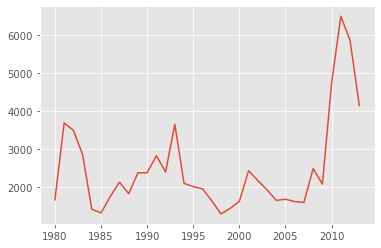

In [37]:
haiti.plot()

*pandas* completó automáticamente el eje x con los valores de los índices (años) y el eje y con los valores de las columnas (población). Sin embargo, observe que los años no se mostraron porque son del tipo cadena. Por lo tanto, modifiquemos el tipo de los valores de índice a entero para su diagramación. 

Además, etiquetemos el eje x y el eje y con `plt.title()`, `plt.ylabel()` y `plt.xlabel()` de la manera siguiente:

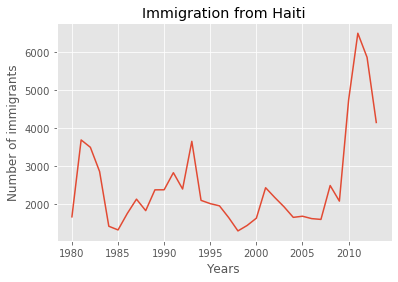

In [38]:
haiti.index = haiti.index.map(int) # cambiemos los valores de índice de Haiti al tipo entero para la diagramación
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # esta línea es necesaria para mostrar las actualizaciones en la figura

Podemos observar con claridad la mayor cantidad de inmigrantes desde Haití a partir de 2010, año en que Canadá aumentó sus esfuerzos para aceptar refugiados haitianos. Anotemos este pico en el diagrama con el método `plt.text()`.

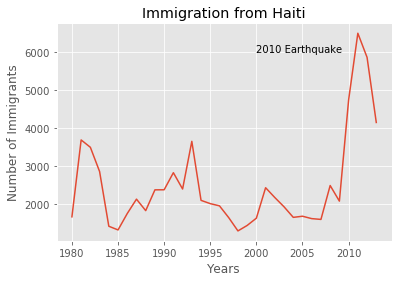

In [39]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# anote el terremoto de 2010.
# sintaxis: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # vea la nota debajo

plt.show() 

Con unas pocas líneas de código, pudo identificar rápidamente el aumento en inmigración y visualizarlo. 

Una nota rápida sobre los valores de x y de y en `plt.text(x, y, label)`: 
 
     Debido a que el eje x (años) es del tipo 'enteros', especificamos x como un año. El eje y (cantidad de inmigrantes) es del tipo 'enteros'; por lo tanto, podemos especificar el valor de y = 6000.
    
```python
    plt.text(2000, 6000, '2010 Earthquake') # años almacenados como tipo entero
```
    Si los años se hubieran almacenado como tipo 'cadena', deberíamos especificar x como la posición del índice para el año. P. ej., el índice 20.º es el año 2000, debido a que se trata del año 20.º a partir del año base de 1980.
```python
    plt.text(20, 6000, '2010 Earthquake') # años almacenados como tipo enteros
```
    Trataremos los métodos de anotación avanzados en módulos posteriores.

Podemos agregar fácilmente más países al gráfico de líneas para llevar a cabo comparaciones significativas en la inmigración desde distintos países.

**Pregunta:** Comparemos la cantidad de inmigrantes desde India y China entre 1980 a 2013. 


Paso 1: Obtenga el conjunto de datos para China e India, y muestre el DataFrame.

In [40]:
China = df_can.loc['China', years] # ejecución en los años 1980 a 2013 para excluir la columna 'total'
China.head()

1980    5123
1981    6682
1982    3308
1983    1863
1984    1527
Name: China, dtype: object

In [41]:
India = df_can.loc['India', years] # ejecución en los años 1980 a 2013 para excluir la columna 'total'
India.head()

1980    8880
1981    8670
1982    8147
1983    7338
1984    5704
Name: India, dtype: object

In [42]:
df_CI = df_can.loc[['China','India'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


Haga doble clic __aquí__ para ver la solución. 
<!-- La respuesta correcta es:
df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()
-->

Paso 2: Diagrame el gráfico. Especificaremos explícitamente el gráfico del líneas al ejecutar el parámetro `kind` en `plot()`.

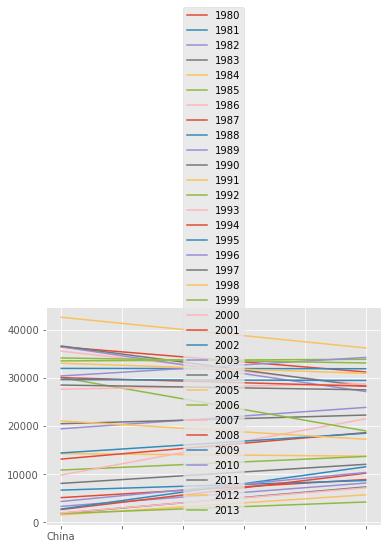

In [43]:
### escriba su respuesta aquí
df_CI.plot(kind='line')


Haga doble clic __aquí__ para ver la solución. 
<!-- La respuesta correcta es:
df_CI.plot(kind='line')
-->

Aparentemente, no es correcto… 

Recuerde que pandas diagrama los índices en el eje x y las columnas como líneas individuales en el eje y. Debido a que `df_CI` es un DataFrame con `country` como índice y years como columnas, debemos primero transponer el DataFrame con el método `transpose()` a fin de intercambiar la fila y las columnas.

In [44]:
df_CI = df_CI.transpose()
df_CI.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


*pandas* creará automáticamente un gráfico con los dos países. Diagrame el nuevo DataFrame transpuesto. Asegúrese de agregar un título al diagrama y de etiquetar los ejes. 

Text(0.5, 0, 'Years')

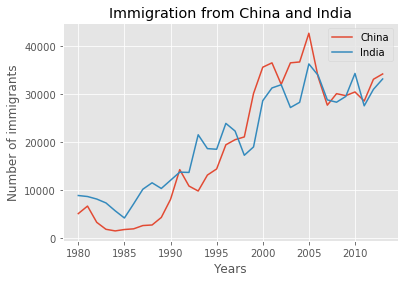

In [45]:
### escriba su respuesta aquí

df_CI.plot(kind='line')

plt.title('Immigration from China and India')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

Haga doble clic __aquí__ para ver la solución. 
<!-- La respuesta correcta es:
df_CI.index = df_CI.index.map(int) # cambiemos los valores de índice de df_CI para escribir un entero para graficar
df_CI.plot(kind='line')
-->

<!--
plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
-->

<!--
plt.show()
--> 

A partir del diagrama precedente, podemos observar que China e India tienen tendencias inmigratorias muy similares a lo largo de los años. 

*Nota*: ¿Por qué no tuvimos que transponer el DataFrame de Haití antes de diagramarlo (como hicimos con df_CI)? did for df_CI)?

Porque `haiti` es una serie, en lugar de un DataFrame, y los años son sus índices, como se muestra debajo.  
```python
print(type(haiti))
print(haiti.head(5))
```
>class 'pandas.core.series.Series' <br>
>1980    1666 <br>
>1981    3692 <br>
>1982    3498 <br>
>1983    2860 <br>
>1984    1418 <br>
>Name: Haiti, dtype: int64 <br>

El gráfico de líneas es una herramienta práctica para mostrar varias variables dependientes contra una variable independiente. Sin embargo, no se recomiendan más de 5 a 10 líneas por gráfico. Si hay más líneas, se hace difícil interpretar el gráfico. 

**Pregunta:** Compare la tendencia de 5 países principales que aportaron la mayor cantidad de inmigrantes a Canadá. 

       Total  India  China  \
1980  143137   8880   5123   
1981  128641   8670   6682   
1982  121175   8147   3308   
1983   89185   7338   1863   
1984   88272   5704   1527   
1985   84346   4211   1816   
1986   99351   7150   1960   
1987  152075  10189   2643   
1988  161585  11522   2758   
1989  191550  10343   4323   
1990  216451  12041   8076   
1991  232802  13734  14255   
1992  254787  13673  10846   
1993  256638  21496   9817   
1994  224382  18620  13128   
1995  212864  18489  14398   
1996  226071  23859  19415   
1997  216036  22268  20475   
1998  174195  17241  21049   
1999  189950  18974  30069   
2000  227455  28572  35529   
2001  250636  31223  36434   
2002  229049  31889  31961   
2003  221349  27155  36439   
2004  235822  28235  36619   
2005  262242  36210  42584   
2006  251640  33848  33518   
2007  236753  28742  27642   
2008  247244  28261  30037   
2009  252170  29456  29622   
2010  280687  34235  30391   
2011  248748  27509  28502   
2012  2579

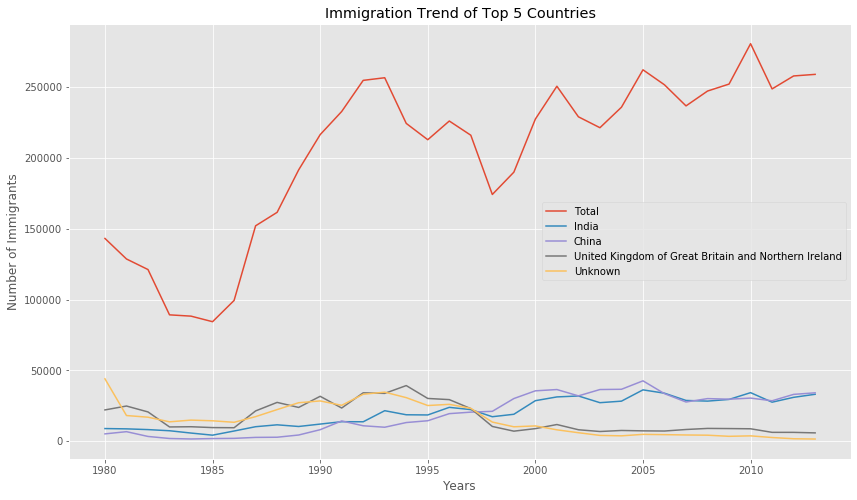

In [46]:
### escriba su respuesta aquí 

df_can.sort_values(by='Total',
                   ascending=False, 
                   axis=0, 
                   inplace=True)

df_top5 = df_can.head(5)
df_top5 = df_top5[years].transpose()
print(df_top5)

# Graficar el marco de datos.  
df_top5.index = df_top5.index.map(int) 
df_top5.plot(kind='line', figsize=(14, 8))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()



Haga doble clic __aquí__ para ver la solución. 
<!-- La respuesta correcta es:
\\ # Paso 1: Obtener el conjunto de datos. Recuerde que creamos una columna Total que calcula la inmigración acumulada por país. \\ Ordenaremos esta columna para obtener nuestros mejores 5 países usando el método pandas sort_values ().
\\ inplace = True paramemter guarda los cambios en el marco de datos df_can original

df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
-->

<!--
# obténgamos las 5 mejores entradas
df_top5 = df_can.head(5)
-->

<!--
# transpóngamos el marco de datos (dataframe)
df_top5 = df_top5[years].transpose() 
-->

<!--
print(df_top5)
-->

<!--
\\ # Paso 2: Graficar el marco de datos. Para hacer que la gráfica sea más legible, cambiaremos el tamaño usando el parámetro `figsize`.
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size
-->

<!--
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
-->

<!--
plt.show()
-->

### Otros gráficos

¡Felicitaciones! Aprendió a dominar datos con Python y a crear un gráfico de líneas con Matplotlib. Hay muchos más estilos de diagramación disponibles, además del gráfico de líneas predeterminado. Puede acceder a todos ellos al ejecutar la palabra clave `kind` en `plot()`. La lista completa de diagramas disponibles es la siguiente:

* `bar` para diagramas de barras verticales
* `barh` para diagramas de barras horizontales
* `hist` para histograma
* `box` para diagrama de caja
* `kde` o `density` para diagramas de densidad
* `area` para diagramas de área
* `pie` para diagramas circulares (de pastel)
* `scatter` para diagramas de dispersión
* `hexbin` para diagramas con agrupamiento hexagonal 

### ¡Gracias por completar este laboratorio! 

Esta libreta fue creada originalmente por [Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan) con aportes de [Ehsan M. Kermani](https://www.linkedin.com/in/ehsanmkermani) y [Slobodan Markovic](https://www.linkedin.com/in/slobodan-markovic).

Recientemente, esta libreta fue modificada por [Alex Aklson](https://www.linkedin.com/in/aklson/). Espero que esta sesión de laboratorio le haya resultado interesante. ¡Si tiene alguna pregunta, comuníquese conmigo!

Esta libreta es parte del curso gratuito de **Cognitive Class** denominado *Visualización de datos con Python*. Si accedió a esta libreta desde fuera del curso, puede llevar a cabo el curso en línea auto-instructivo haciendo clic [aquí](https://cocl.us/DV0101EN_Lab1).

Derechos de autor &copy; 2018 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). Esta cuaderno y su código fuente se publican bajo los términos de la [Licencia de MIT](https://bigdatauniversity.com/mit-license/).